In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pygame
from time import sleep

# Fourier Synthesis
## Time series

In [8]:
# constants
T = 2
omega0 = np.pi

# function
x = lambda t: 1.5*(np.abs(t) < 1).astype(float) - 1.5*(np.abs(t) > 1).astype(float)

# time steps
ts = np.linspace(0, 2, 100)
xs = x(ts)


## Fourier coefficients

In [15]:
# coeffs
def ak_gen(k):
    if k == 0:
        return 0
    return 3 / (k*np.pi) * np.exp(-1j * k * np.pi / 2) * np.sin(k * np.pi / 2)
    return 3/(2*1j*np.pi*k) * (1 - (-1)**k)
# approximation
x_hat = lambda t, K, omega0, ak: sum([ak(k) * np.exp(1j * k  * omega0 * t) for k in range(-K, K + 1)])


In [16]:
x_approximations = {}
for i in [1, 2, 3, 8, 12, 15, 20, 25, 30, 50]:
    x_approximations[i] = np.real(x_hat(ts, i, omega0, ak_gen))

## Plot

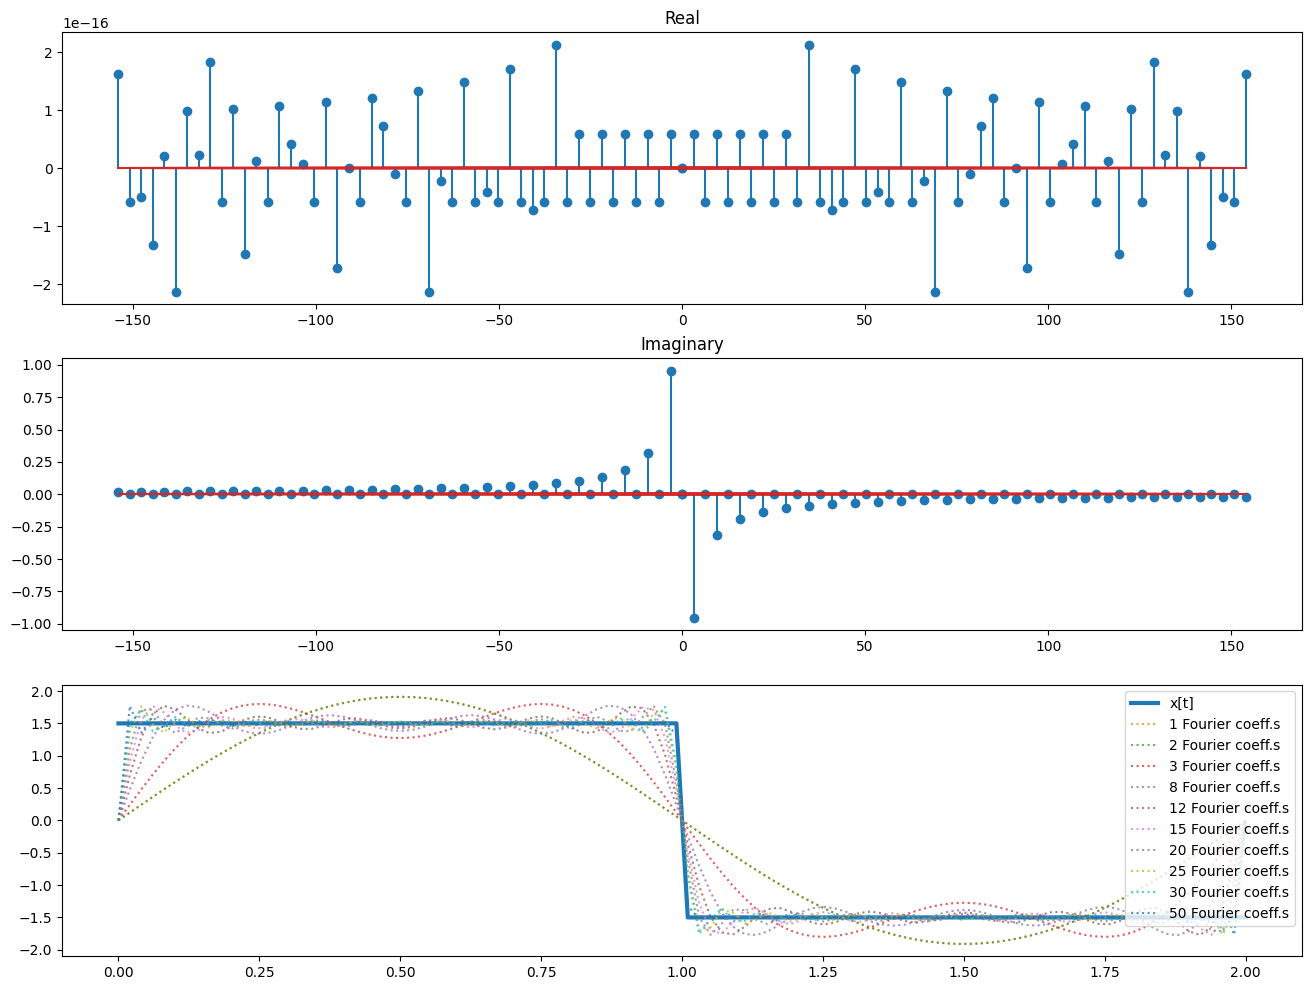

In [17]:
fig, axes = plt.subplots(nrows=3, figsize=(16, 12))
axes[2].plot(ts, xs, label='x[t]', linewidth=3)

for i in range(max(list(x_approximations.keys()))):
    axes[0].stem([i*omega0, -i*omega0,], [np.real(ak_gen(i)), np.real(ak_gen(-i))])
    axes[0].set_title('Real')
    axes[1].stem([i*omega0, -i*omega0,], [np.imag(ak_gen(i)), np.imag(ak_gen(-i))])
    axes[1].set_title('Imaginary')
for i in x_approximations:
    axes[2].plot(ts, np.real(x_approximations[i]), ':',
            label=f'{i} Fourier coeff.s', alpha=0.75)

axes[2].legend()
plt.show()

## Play as sound
### Init mix

In [11]:
pygame.mixer.pre_init(80000, size=-16, channels=1)
pygame.mixer.init()

### Play original

In [12]:
# original
x_sound = np.array(1000 * list(xs))
sound = pygame.sndarray.make_sound((.1 *x_sound*32768).astype(np.int16))
print('Playing original...', end='\r')
sound.play()

sleep(1)

### Approximations

In [13]:
for i in x_approximations:
    x_sound = np.array(1000 * list(x_approximations[i]))
    sound = pygame.sndarray.make_sound((.1 *x_sound*32768).astype(np.int16))
    print(f"Playing {i}'th aproximation...", end='\r')
    sound.play()
    sleep(1.5)

In [9]:
pygame.mixer.quit()